In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

In [95]:
emp_promotion= pd.read_csv("employee_promotion.csv")

In [96]:
emp_promotion.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [97]:
emp_promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [98]:
emp_promotion.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [99]:
emp_promotion.shape

(54808, 13)

In [100]:
    emp_promotion[emp_promotion.duplicated()]#finding the duplicated rows

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted


In [101]:
emp_promotion.drop_duplicates()#removing the duplicated rows


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [102]:
emp_promotion

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


<AxesSubplot:>

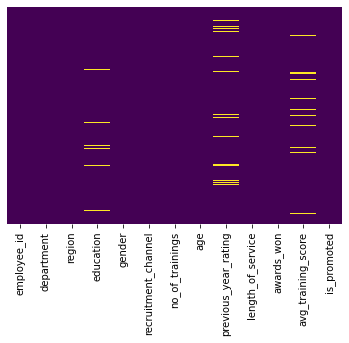

In [103]:
sns.heatmap(emp_promotion.isnull(),yticklabels=False,cbar=False,cmap='viridis')# visually created map to see the columns consisting blank values

In [104]:
print(emp_promotion.isna().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64


In [105]:
emp_promotion.isnull().mean()*100# percentage of value missing

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won              0.000000
avg_training_score      4.670851
is_promoted             0.000000
dtype: float64

<AxesSubplot:>

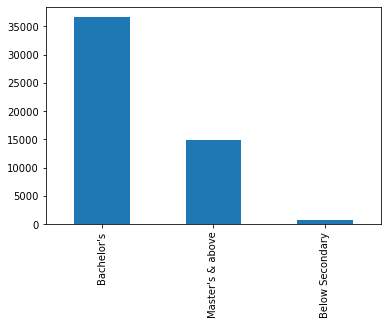

In [106]:
emp_promotion['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

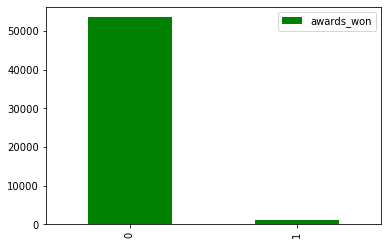

In [107]:
emp_promotion['awards_won'].value_counts().plot(kind='bar',color='green',legend='category')

In [108]:
emp_promotion['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [109]:
#emp_promotion1["education"].fillna("no_degree", inplace=True)

In [110]:
emp_promotion.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


In [111]:
print(emp_promotion.isna().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64


In [112]:
emp_promotion.interpolate(inplace=True)# fills NAN values using interpolate pandas method

In [113]:
emp_promotion.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [114]:
emp_promotion.dropna(inplace=True)

In [115]:
emp_promotion.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [116]:
emp_promotion.shape

(52399, 13)

<AxesSubplot:>

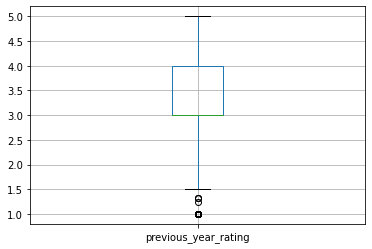

In [117]:
emp_promotion.boxplot(column=['previous_year_rating'])

<AxesSubplot:>

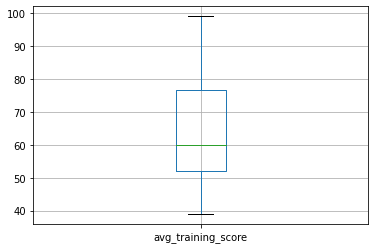

In [118]:
emp_promotion.boxplot(column=['avg_training_score'])

<AxesSubplot:>

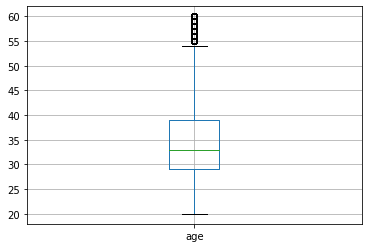

In [119]:
emp_promotion.boxplot(column=['age'])

In [120]:
emp_promotion.corr()['is_promoted']


employee_id             0.000751
no_of_trainings        -0.025389
age                    -0.018920
previous_year_rating    0.149112
length_of_service      -0.012167
awards_won              0.195451
avg_training_score      0.178463
is_promoted             1.000000
Name: is_promoted, dtype: float64

<AxesSubplot:ylabel='education'>

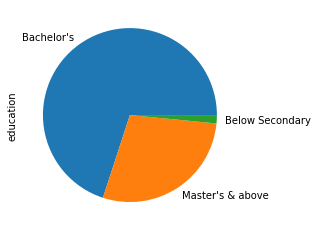

In [121]:
emp_promotion['education'].value_counts().plot(kind="pie")





Text(0.5, 1.0, 'Bar chart')

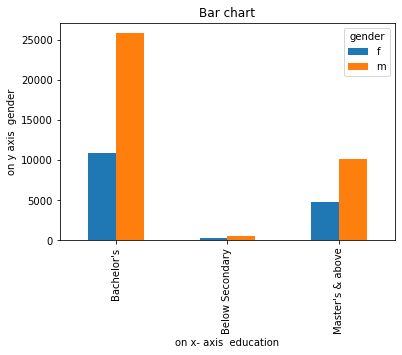

In [122]:
pd.crosstab(emp_promotion.education,emp_promotion.gender).plot(kind="bar")
plt.xlabel('on x- axis  education')
plt.ylabel('on y axis  gender')
plt.title('Bar chart')

Text(0.5, 1.0, 'Bar chart')

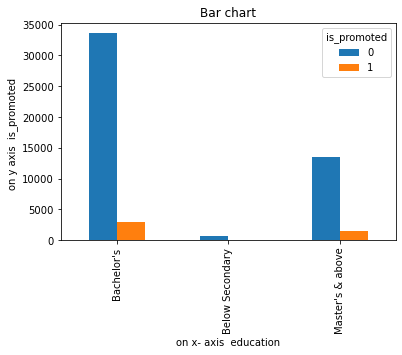

In [123]:
pd.crosstab(emp_promotion.education,emp_promotion.is_promoted).plot(kind="bar")
plt.xlabel('on x- axis  education')
plt.ylabel('on y axis  is_promoted ')
plt.title('Bar chart')

Text(0.5, 1.0, 'Bar chart')

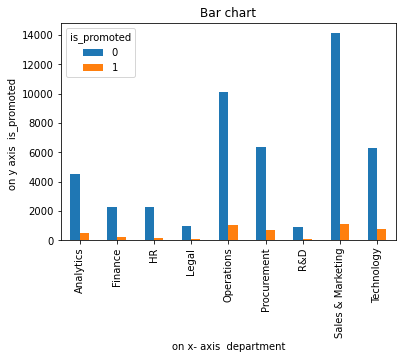

In [124]:
pd.crosstab(emp_promotion.department,emp_promotion.is_promoted).plot(kind="bar")
plt.xlabel('on x- axis  department')
plt.ylabel('on y axis  is_promoted ')
plt.title('Bar chart')

Text(0.5, 1.0, 'Bar chart')

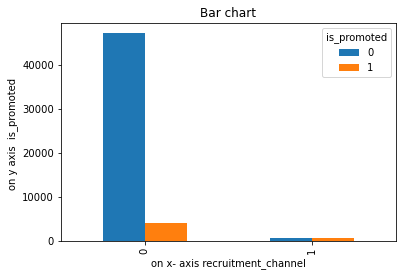

In [125]:
pd.crosstab(emp_promotion.awards_won,emp_promotion.is_promoted).plot(kind="bar")
plt.xlabel('on x- axis recruitment_channel')
plt.ylabel('on y axis  is_promoted ')
plt.title('Bar chart')

In [126]:
pd.unique(pd.Series(['education']))

array(['education'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='count'>

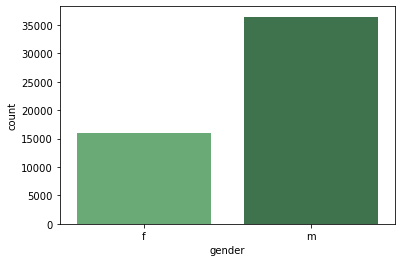

In [127]:
sns.countplot(x='gender',data=emp_promotion,palette='Greens_d')

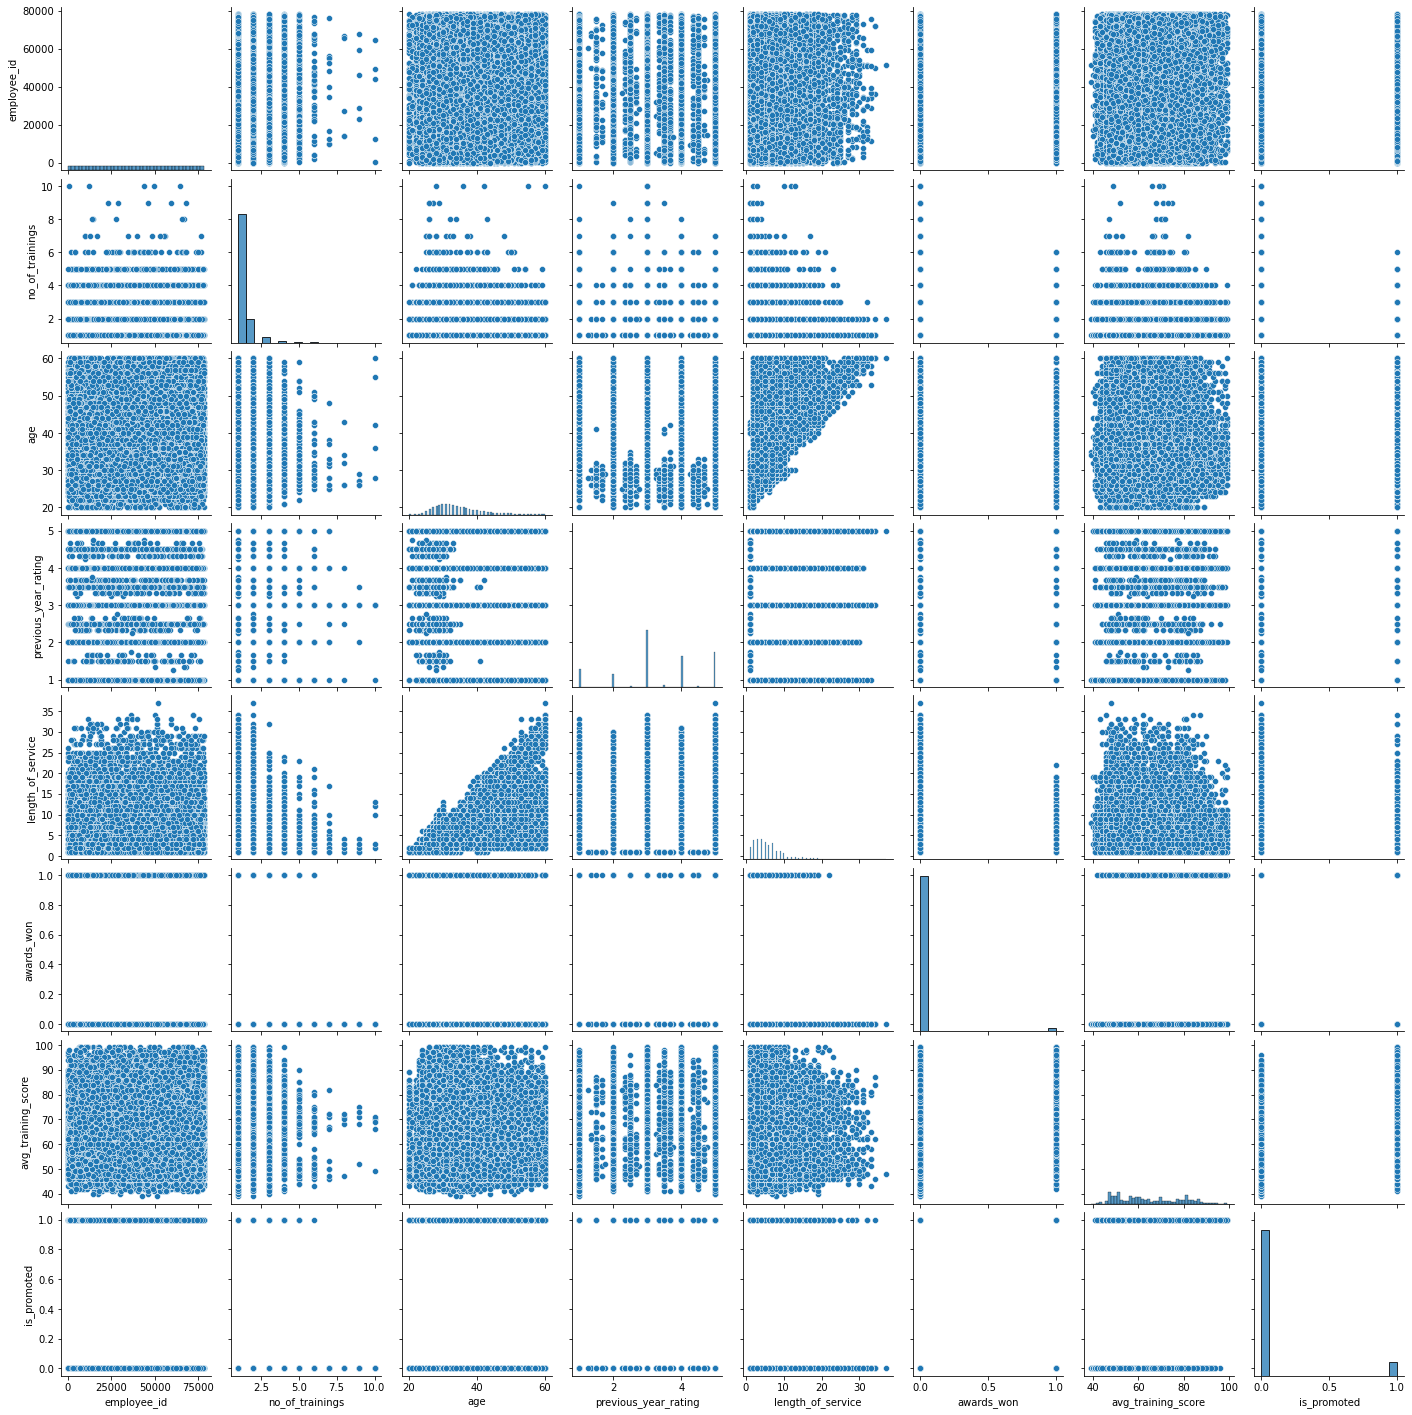

In [128]:
sns.pairplot(emp_promotion)

In [129]:

emp_promotion['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [130]:
col=['department','region','recruitment_channel','education']

for x in col:
    print(x)
    print(emp_promotion[x].unique())
    print(emp_promotion[x].nunique())
    print()
    
    

department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
9

region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
34

recruitment_channel
['sourcing' 'other' 'referred']
3

education
["Master's & above" "Bachelor's" 'Below Secondary']
3



In [131]:
emp_promotion.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.004701,0.000007,0.005071,0.000742,0.007586,0.000612,0.000751
no_of_trainings,-0.004701,1.000000,-0.082601,-0.060518,-0.057845,-0.007659,0.041749,-0.025389
age,0.000007,-0.082601,1.000000,0.005522,0.652379,-0.008209,-0.060172,-0.018920
previous_year_rating,0.005071,-0.060518,0.005522,1.000000,-0.000325,0.026564,0.064670,0.149112
length_of_service,0.000742,-0.057845,0.652379,-0.000325,1.000000,-0.040140,-0.045687,-0.012167
awards_won,0.007586,-0.007659,-0.008209,0.026564,-0.040140,1.000000,0.072156,0.195451
avg_training_score,0.000612,0.041749,-0.060172,0.064670,-0.045687,0.072156,1.000000,0.178463
is_promoted,0.000751,-0.025389,-0.018920,0.149112,-0.012167,0.195451,0.178463,1.000000


In [132]:
emp_promotion.drop('employee_id',axis=1,inplace=True)


In [133]:
emp_promotion.drop('region',axis=1,inplace=True)
emp_promotion.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


## USE LABEL ENCODER TO TRANSFORM THE DATA

In [134]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
emp_promotion.department = le.fit_transform(emp_promotion.department)
emp_promotion.education = le.fit_transform(emp_promotion.education)
emp_promotion.gender = le.fit_transform(emp_promotion.gender)
emp_promotion.recruitment_channel = le.fit_transform(emp_promotion.recruitment_channel)


In [135]:
emp_promotion.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,2,0,2,1,35,5.0,8,0,49.0,0
1,4,0,1,0,1,30,5.0,4,0,60.0,0
2,7,0,1,2,1,34,3.0,7,0,50.0,0
3,7,0,1,0,2,39,1.0,10,0,50.0,0
4,8,0,1,0,1,45,3.0,2,0,73.0,0


## splitting the data into train and test split

In [136]:
X=emp_promotion.drop('is_promoted',axis=1)
y=emp_promotion['is_promoted']


In [137]:
X

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,7,2,0,2,1,35,5.0,8,0,49.0
1,4,0,1,0,1,30,5.0,4,0,60.0
2,7,0,1,2,1,34,3.0,7,0,50.0
3,7,0,1,0,2,39,1.0,10,0,50.0
4,8,0,1,0,1,45,3.0,2,0,73.0
...,...,...,...,...,...,...,...,...,...,...
54802,7,0,1,0,2,31,1.0,2,0,49.0
54803,8,0,1,2,1,48,3.0,17,0,78.0
54804,4,2,0,0,1,37,2.0,6,0,56.0
54805,0,0,1,0,1,27,5.0,3,0,79.0


In [138]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54802    0
54803    0
54804    0
54805    0
54807    0
Name: is_promoted, Length: 52399, dtype: int64

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler

In [140]:
X_train.shape

(36679, 10)

In [141]:
 y_train.shape

(36679,)

In [142]:
X_test

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
22945,7,0,1,0,1,40,5.0,6,0,46.0
32979,4,0,1,0,1,35,5.0,7,0,60.0
36153,7,0,1,2,1,37,2.0,7,0,48.0
24063,8,2,1,0,2,38,1.0,6,0,83.0
48391,7,0,0,0,1,42,3.0,5,0,46.0
...,...,...,...,...,...,...,...,...,...,...
32733,0,0,1,2,1,34,3.0,5,0,82.0
8051,4,2,0,1,1,43,4.0,10,0,59.0
29238,4,2,1,0,1,41,4.0,12,0,58.0
19086,4,0,1,0,1,27,5.0,4,0,55.0


In [143]:
 y_test.shape

(15720,)

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler()
#sc.fit(X_train)
#X_train = sc.transform(X_train)
#X_test = sc.transform(X_test)



In [145]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [146]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14328    28]
 [ 1263   101]]


In [148]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14356
           1       0.78      0.07      0.14      1364

    accuracy                           0.92     15720
   macro avg       0.85      0.54      0.55     15720
weighted avg       0.91      0.92      0.89     15720



## Decision Tree Classifier

In [171]:
# splitting the data -80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [172]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("\033[1m Accuracy of KNN Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of KNN Classifier on test set: 86.86%


In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     15802
           1       0.27      0.32      0.30      1490

    accuracy                           0.87     17292
   macro avg       0.60      0.62      0.61     17292
weighted avg       0.88      0.87      0.87     17292



In [153]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [155]:

y_pred = classifier.predict(X_test)


In [156]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [158]:
print(confusion_matrix)

[[14231   125]
 [ 1120   244]]


In [173]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [174]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("\033[1m Accuracy of KNN Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of KNN Classifier on test set: 86.86%


In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     15802
           1       0.27      0.32      0.30      1490

    accuracy                           0.87     17292
   macro avg       0.60      0.62      0.61     17292
weighted avg       0.88      0.87      0.87     17292



In [176]:
X=emp_promotion.drop('is_promoted',axis=1)
y=emp_promotion['is_promoted']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, criterion='entropy',random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [178]:
y_pred = classifier.predict(X_test)

In [179]:
y_test

22945    1
32979    0
36153    0
24063    0
48391    0
        ..
32733    0
8051     0
29238    0
19086    0
28220    0
Name: is_promoted, Length: 15720, dtype: int64

In [180]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [181]:
print(confusion_matrix)

[[14158   198]
 [ 1059   305]]


In [185]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("\033[1m Accuracy of RandomForest Classifier on test set:",'{:.2%}'.format(accuracy_score(y_test, y_pred)))

 Accuracy of RandomForest Classifier on test set: 8.68%


C:\Users\chenu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14356
           1       0.09      1.00      0.16      1364

    accuracy                           0.09     15720
   macro avg       0.04      0.50      0.08     15720
weighted avg       0.01      0.09      0.01     15720



C:\Users\chenu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chenu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chenu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
X=emp_promotion.drop('is_promoted',axis=1)
y=emp_promotion['is_promoted']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [167]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42, gamma=.10,C=1.0 )
classifier.fit(X_train, y_train)

SVC(gamma=0.1, kernel='linear', random_state=42)

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [83]:
print(confusion_matrix)

[[14356     0]
 [ 1364     0]]


In [84]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("\033[1m Accuracy of SV Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))


 Accuracy of SV Classifier on test set: 86.82%


In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     14356
           1       0.28      0.32      0.30      1364

    accuracy                           0.87     15720
   macro avg       0.60      0.62      0.61     15720
weighted avg       0.88      0.87      0.87     15720

